<a href="https://colab.research.google.com/github/jrenatom/tarefa1_PL_A1/blob/main/Trilha_6_ex_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ex Trilha 6
#Exemplo de processamento de linguagem natural
#em Python

In [136]:
import requests
	 
url = 'https://lowendmac.com'	

res = requests.get(url)	 # , {'uf': 'RS'}
html_page = res.text
#print(html_page)

In [137]:
from bs4 import BeautifulSoup	 
soup = BeautifulSoup(html_page, 'html.parser') 
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [138]:
import requests

# Fetch a web page
r = requests.get(url)
#print(r.text)

In [139]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
#print(pattern.sub('', r.text))  # replace them with blank

In [140]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
#print(soup.get_text())

In [141]:
# Find all articles
lista = soup.find_all(class_="entry-content")


In [142]:
import os
import nltk
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))

In [144]:
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request

In [145]:
response = request.urlopen(url)
raw = response.read().decode('utf8')


In [146]:
type(raw)



str

In [147]:
len(raw)


245174

In [148]:
tokens = word_tokenize(raw)

In [149]:
type(tokens)

list

In [150]:
len(tokens)

53418

In [ ]:
tokens[20000:20010]

In [152]:
text = nltk.Text(tokens)

In [153]:
type(text)

nltk.text.Text

In [154]:
len(text)

53418

In [157]:
amostra = text[20000:]
lixo = text[1:10000]

In [159]:
lixo[:10]

['!', 'DOCTYPE', 'html', '>', '<', '!', '--', '[', 'if', 'IE']

In [158]:
amostra[:10]

['why',
 'not',
 'combine',
 'your',
 'passion',
 'and',
 'actually',
 'create',
 'something',
 'that']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


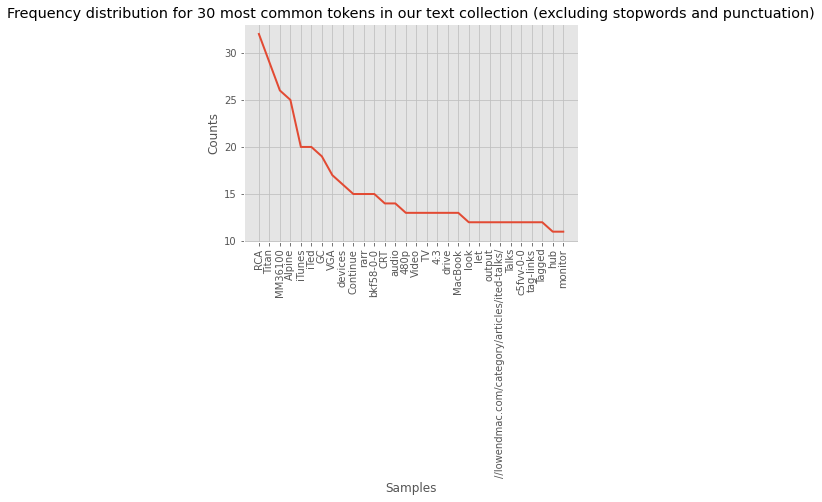

In [179]:
nltk.download('stopwords')
from nltk.corpus import stopwords
remove_these = set(stopwords.words('english') + lixo )  
filtered_text = [w for w in amostra if not w in remove_these ]
p1 = {'Pismo', 'Ridge', '’', 'data-offset-key=', 'Apple-converted-space', 'ago',  'more-link'}
filtered_text = [w for w in filtered_text if not w in p1 ]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [178]:
fdist_filtered

FreqDist({'RCA': 32, 'Titan': 29, 'MM36100': 26, 'Alpine': 25, 'iTunes': 20, 'iTed': 20, 'GC': 19, 'VGA': 17, 'Continue': 15, 'rarr': 15, ...})

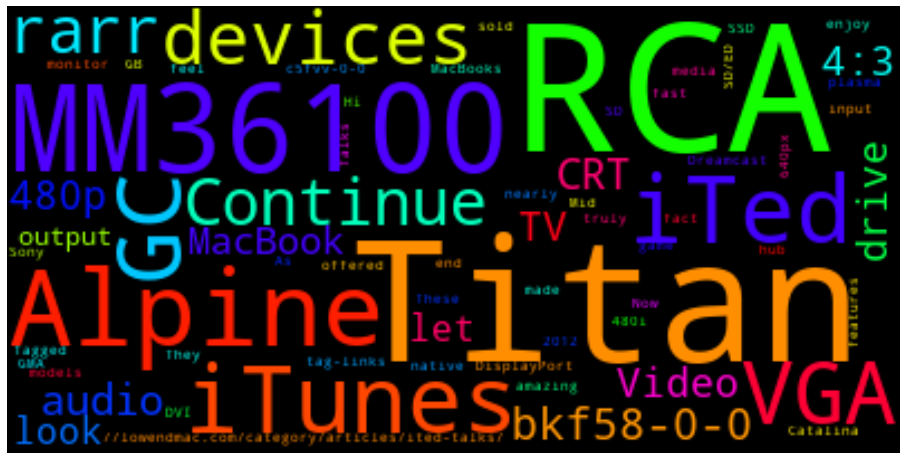

In [180]:
from collections import Counter
dictionary=Counter(filtered_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [183]:
import os
import pathlib
import json

json_object = json.dumps(fdist_filtered, indent=4)
# Writing to sample.json
with open("trilha6data.json", "w") as outfile:
    outfile.write(json_object)
